In [1]:
import numpy as np
import cv2
import time
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def show(img):
    #plt.imshow(img)
    #plt.show()
    cv2.imshow('Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [4]:
img = cv2.imread('data/raw/baby_0.jpg')

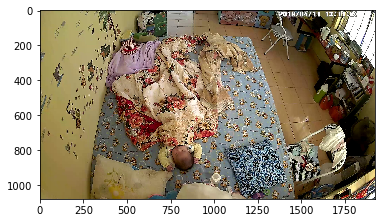

In [5]:
plt.imshow(convertToRGB(img))
plt.show()

- [Basic image resizing with openCV](https://www.pyimagesearch.com/2014/01/20/basic-image-manipulations-in-python-and-opencv-resizing-scaling-rotating-and-cropping/)

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

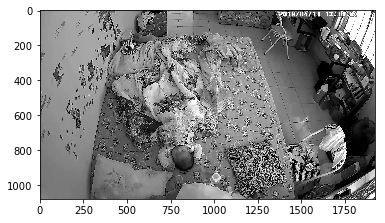

In [7]:
plt.imshow(img_gray, cmap='gray')

#### resizing

In [8]:
def resizing(img, height):
    r = height / img.shape[1]
    dim = (height, int(img.shape[0] * r))
    
    img_resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    return img_resized

In [9]:
img_resized = resizing(img, 100)
show(img_resized)

### Downsample with subtraction technique

In [10]:
def down_sample_by_subtraction(folder):
    dir_train = folder + '*.jpg'
    dir_out="data/class/"
    thresh_level = 15 

    img_files = glob.glob(dir_train)
    number_files = len(img_files)
    movement_graph = [0]*number_files
    
    print('Total number frame:', number_files)

    is_first_frame = True
    for i, file in enumerate(img_files):
        thisFrame = cv2.imread(file)
        thisFrame_gr = cv2.cvtColor(thisFrame, cv2.COLOR_BGR2GRAY)
        thisFrame_gr_blur = cv2.GaussianBlur(thisFrame_gr, (21, 21), 0)

        # if thisFrame is the first frame, then go to next loop
        if is_first_frame:
            prevFrame_gr_blur = thisFrame_gr_blur
            is_first_frame = False
            continue

        # compute diff prev & current frame, max 0
        frameDelta = cv2.subtract(prevFrame_gr_blur, thisFrame_gr_blur)
        frameDelta2 = cv2.subtract(thisFrame_gr_blur, prevFrame_gr_blur)
        frameDelta = cv2.max(frameDelta2, frameDelta)

        # set threshold
        thresh = cv2.threshold(frameDelta, thresh_level, 255, cv2.THRESH_BINARY)[1]

        # dilate the thresholded image to fill in holes
        thresh = cv2.dilate(thresh, None, iterations=2)
        
        # turn into scalar
        thresh_ones = np.zeros(thresh.shape)
        thresh_ones[thresh == 255] = 1
        movement_graph[i]= np.sum(thresh_ones)

        # write images to class directory
        if movement_graph[i] > 10000 and movement_graph[i] < 200000: 
            print('Saving frame:', i)
            cv2.imwrite(dir_out + str(i) + '.jpg', thisFrame)

        # print loop status
        print('Processing frame: ' + str(i)+ '/'+ str(number_files))

        # setting for the next loop
        prevFrame_gr_blur = thisFrame_gr_blur

    #print(movement_graph)
    plt.plot(movement_graph)

Total number frame: 307
Processing frame: 1/307
Processing frame: 2/307
Processing frame: 3/307
Processing frame: 4/307
Processing frame: 5/307
Processing frame: 6/307
Processing frame: 7/307
Processing frame: 8/307
Processing frame: 9/307
Processing frame: 10/307
Processing frame: 11/307
Processing frame: 12/307
Processing frame: 13/307
Processing frame: 14/307
Processing frame: 15/307
Processing frame: 16/307
Processing frame: 17/307
Processing frame: 18/307
Processing frame: 19/307
Processing frame: 20/307
Processing frame: 21/307
Processing frame: 22/307
Processing frame: 23/307
Processing frame: 24/307
Processing frame: 25/307
Processing frame: 26/307
Processing frame: 27/307
Processing frame: 28/307
Processing frame: 29/307
Processing frame: 30/307
Processing frame: 31/307
Processing frame: 32/307
Processing frame: 33/307
Processing frame: 34/307
Processing frame: 35/307
Processing frame: 36/307
Processing frame: 37/307
Processing frame: 38/307
Processing frame: 39/307
Processing

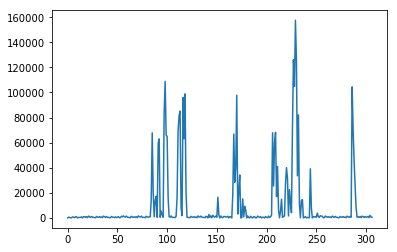

In [11]:
down_sample_by_subtraction('data/raw/')

### Manual assign data into classes
- Assigning images into 4 class in "train" folder: 
    - awake (key 1) 
    - sleep (key 2) 
    - like-awake(key 3)
    - flip (key 4)

In [2]:
classes = ['awake', 'sleep', 'like-awake', 'flip']

In [3]:
for cl in classes:
    try:
        if not os.path.exists('data/train/' + cl):
            os.makedirs('data/train/' + cl)
    except OSError:
        print('Error while creating directory of data/train')

In [4]:
def manual_assign_classes(img_dir, dir_out):
    img_files = glob.glob(img_dir + '*.jpg')
    number_files = len(img_files)
    print('Total number frame:', number_files)
    
    img_idx = 0
    while True:
        if img_idx == number_files: 
            cv2.destroyAllWindows()
            break
            
        file = img_files[img_idx]
        img = cv2.imread(file)
        cv2.imshow('img', img)
        k = cv2.waitKey(33)
        if k == 27:
            cv2.destroyAllWindows()
            break
        elif k == -1:  
            continue
        else:
            cl = k - 49
            if cl < 0 or cl > 3:
                continue
                
            print('Frame', img_idx, 'is assigned into class:', classes[cl])
            cv2.imwrite(dir_out + classes[cl] + '/' + str(img_idx) + '.jpg', img)     
            img_idx += 1

In [5]:
manual_assign_classes('data/class/', 'data/train/')

Total number frame: 56
Frame  0 is assigned into class: like-awake
Frame  1 is assigned into class: like-awake
Frame  2 is assigned into class: awake
Frame  3 is assigned into class: sleep
Frame  4 is assigned into class: sleep
Frame  5 is assigned into class: like-awake
Frame  6 is assigned into class: sleep
Frame  7 is assigned into class: like-awake
Frame  8 is assigned into class: like-awake
Frame  9 is assigned into class: like-awake
Frame  10 is assigned into class: sleep
Frame  11 is assigned into class: sleep
Frame  12 is assigned into class: like-awake
Frame  13 is assigned into class: like-awake
Frame  14 is assigned into class: like-awake
Frame  15 is assigned into class: sleep
Frame  16 is assigned into class: like-awake
Frame  17 is assigned into class: like-awake
Frame  18 is assigned into class: sleep
Frame  19 is assigned into class: sleep
Frame  20 is assigned into class: sleep
Frame  21 is assigned into class: sleep
Frame  22 is assigned into class: like-awake
Frame  